In [ ]:
#Here, we are implementing 5 ML Models and there implementation is shown below:-

In [67]:
#Here we are importing the necessary packages which are required for modeling are ML model
#1. We are using KNN Model for Modeling
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [68]:

# Load the dataset and reduced the number of rows by using this formula i.e it reduced to 419887 out of 1048575
df = pd.read_csv('F:\Project_files\output.csv', nrows=int(0.1*sum(1 for line in open('F:\Project_files\output.csv'))))
#df=df.head()

# Split the dataset into features and target labels
X = df.drop('activity', axis=1)
y = df['activity']

# Preprocess the data
X.fillna(X.mean(), inplace=True)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


df

,lastSensorEventHours,lastSensorEventSeconds,lastSensorDayOfWeek,windowDuration,timeSinceLastSensorEvent,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,...,sensorElTime-Chair,sensorElTime-DiningRoom,sensorElTime-Hall,sensorElTime-Ignore,sensorElTime-Kitchen,sensorElTime-LivingRoom,sensorElTime-Office,sensorElTime-OutsideDoor,sensorElTime-WorkArea,activity
0,10.0,38464.0,4.0,130.0,0.0,0.0,0.0,5.0,5.0,9.0,...,86400.0,86400.000000,86400.0,0.000000,86400.000000,86400.000000,86400.0,1.816728,86400.000000,28
1,10.0,38465.0,4.0,131.0,1.0,0.0,0.0,9.0,9.0,9.0,...,86400.0,86400.000000,86400.0,0.055818,86400.000000,86400.000000,86400.0,0.000000,86400.000000,28
2,10.0,38578.0,4.0,241.0,113.0,0.0,0.0,5.0,5.0,9.0,...,86400.0,86400.000000,86400.0,0.000000,86400.000000,86400.000000,86400.0,113.423815,86400.000000,28
3,10.0,38582.0,4.0,244.0,4.0,0.0,0.0,5.0,5.0,9.0,...,86400.0,86400.000000,86400.0,0.000000,86400.000000,86400.000000,86400.0,117.696845,86400.000000,28
4,10.0,38582.0,4.0,243.0,0.0,0.0,0.0,9.0,9.0,9.0,...,86400.0,86400.000000,86400.0,0.063296,86400.000000,86400.000000,86400.0,0.000000,86400.000000,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419882,17.0,62806.0,1.0,1577.0,48.0,7.0,5.0,5.0,5.0,-1.0,...,86400.0,8012.799836,86400.0,0.000000,8051.677219,2360.818987,86400.0,11909.797799,11767.357847,27
419883,17.0,62815.0,1.0,1577.0,9.0,7.0,5.0,5.0,5.0,-1.0,...,86400.0,8022.255167,86400.0,0.000000,8061.132550,2370.274318,86400.0,11919.253130,11776.813178,27
419884,17.0,62842.0,1.0,1493.0,27.0,7.0,5.0,5.0,5.0,-1.0,...,86400.0,8048.776843,86400.0,0.000000,8087.654226,2396.795994,86400.0,11945.774806,11803.334854,27
419885,17.0,62899.0,1.0,1522.0,57.0,7.0,5.0,5.0,5.0,-1.0,...,86400.0,8106.146497,86400.0,0.000000,8145.023880,2454.165648,86400.0,12003.144460,11860.704508,27


In [69]:
#Here we have taken the value of k from 1to5
# Checking the accuracy for Full-Feature Selection
k = [1,2,3,4,5] #random values 
for i in k:
   knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
   knn.fit(X_train, y_train)
   y_pred = knn.predict(X_test)
   acc = accuracy_score(y_test, y_pred)
   print(f"Accuracy: {acc}","", i)


Accuracy: 0.9519397937555074  1
Accuracy: 0.9380790206958965  2
Accuracy: 0.938150467979709  3
Accuracy: 0.9292195575031555  4
Accuracy: 0.9269689680630642  5


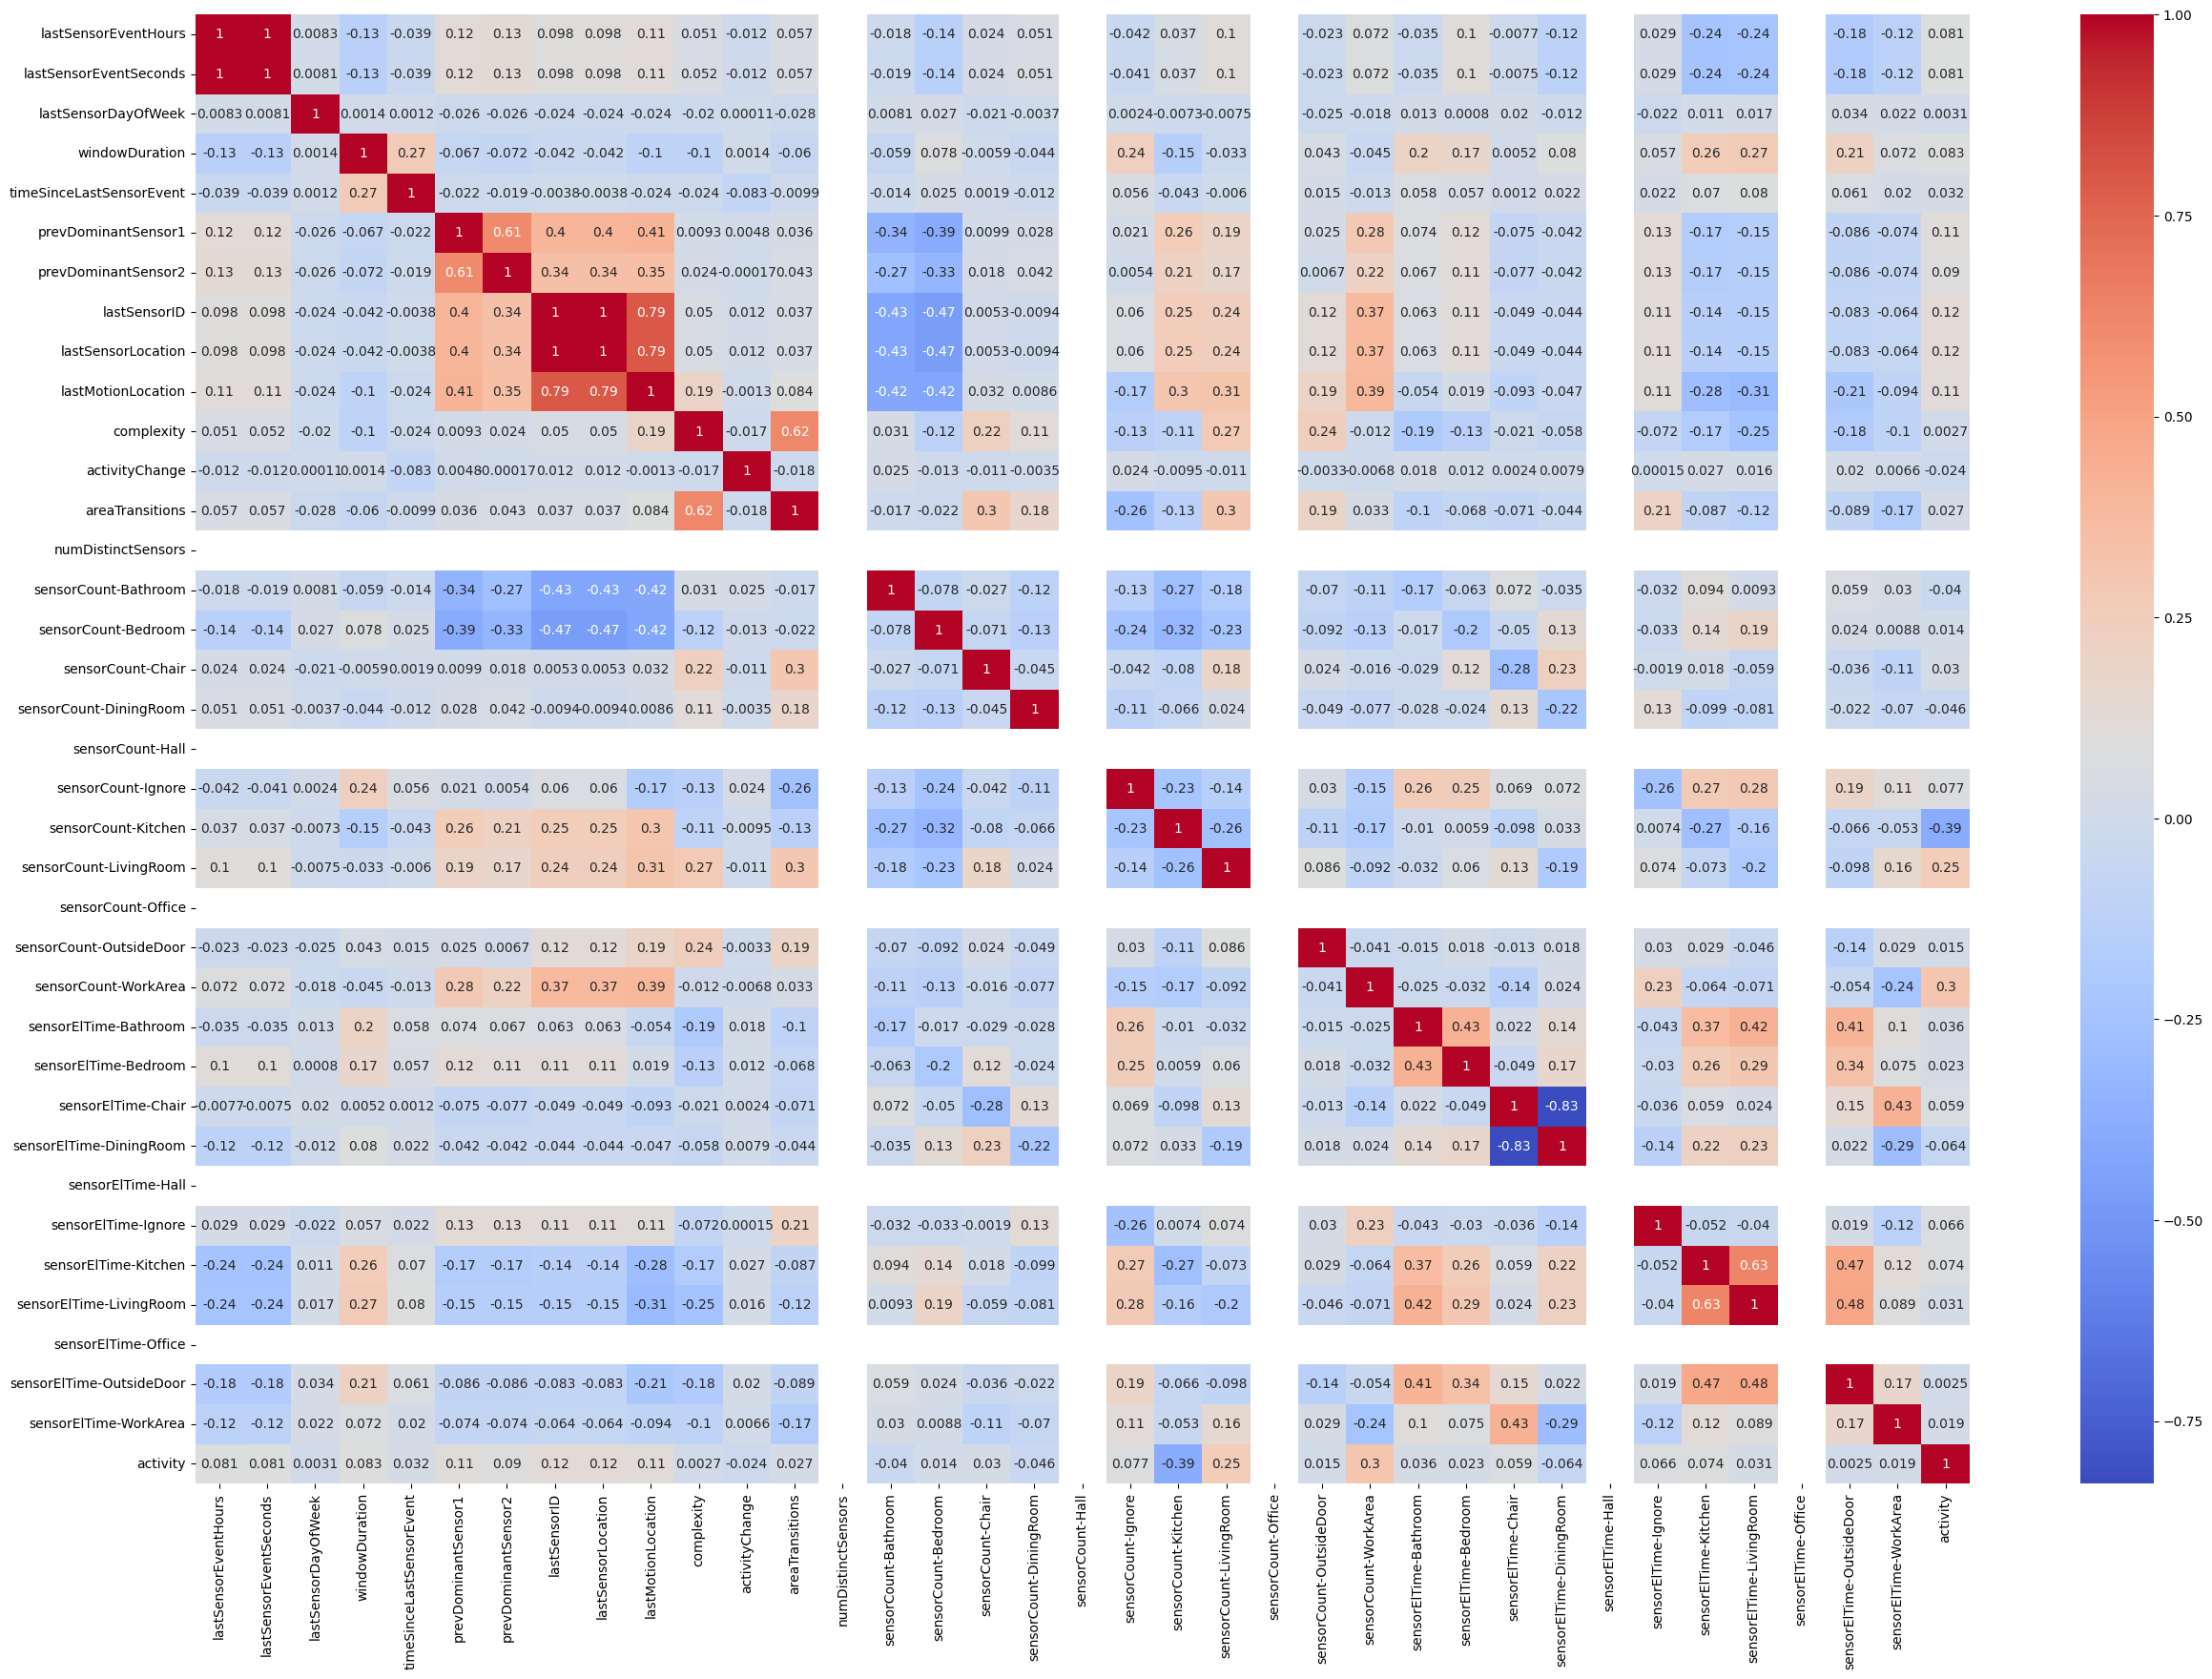

In [70]:
#We are doing feature Selection so we have to find the correlationship between each column with target attribute
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the dataset
df = pd.read_csv('F:\Project_files\output.csv')

# Calculate the correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)



# Show the plot
plt.show()

In [71]:
#We have selected the features which are very much common to the target feature
df_unique = pd.DataFrame(df, columns=['sensorElTime-DiningRoom','lastSensorLocation','lastSensorEventSeconds'])
df_unique

,sensorElTime-DiningRoom,lastSensorLocation,lastSensorEventSeconds
0,86400.000000,5.0,38464.0
1,86400.000000,9.0,38465.0
2,86400.000000,5.0,38578.0
3,86400.000000,5.0,38582.0
4,86400.000000,9.0,38582.0
...,...,...,...
4198871,161.881443,5.0,34382.0
4198872,0.000000,3.0,34382.0
4198873,0.000000,3.0,34384.0
4198874,0.000000,3.0,34387.0


In [72]:
#We would be training data for the feature selection based on common features and target features
X = df_unique
y = df['activity']

# Preprocess the data
X.fillna(X.mean(), inplace=True)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
#We would be importing the package for loading the file into the disk
import pickle

In [92]:
#We would be saving the model to the disk 
file_13 = 'model1.sav'
pickle.dump(knn, open(file_13, 'wb'))

In [91]:
#We would be finding the accuracy of the model for feature selection
#Accuracy of feature selection and full-feature may vary because we have not included all the columns 
#We have only taken those columns which are very much common based on target field
k = [1,2,3,4,5] #random values 
for i in k:
   knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
   knn.fit(X_train, y_train)
   y_pred = knn.predict(X_test)
   acc = accuracy_score(y_test, y_pred)
   print(f"KNN Accuracy Score: {acc}","", i)


KNN Accuracy Score: 0.9519397937555074  1
KNN Accuracy Score: 0.9380790206958965  2
KNN Accuracy Score: 0.938150467979709  3
KNN Accuracy Score: 0.9292195575031555  4
KNN Accuracy Score: 0.9269689680630642  5


In [93]:
#load the model again and it will be saving the result of the final accuracy obtained from k-value here you can change the name of the file to check the accuracy 
file_13 = 'model1.sav'
loaded_model = pickle.load(open(file_13, 'rb'))
result = loaded_model.score(X_test, y_test)
print("Final Accuracy",result)

Final Accuracy 0.9269689680630642


In [79]:
#2. SVM Implementation
from sklearn.svm import SVC

In [38]:
# Load the dataset and reduced the number of rows by using this formula i.e it reduced to 419887 out of 1048575
df = pd.read_csv('F:\Project_files\output.csv', nrows=int(0.1*sum(1 for line in open('F:\Project_files\output.csv'))))
#df=df.head()

# Split the dataset into features and target labels
X = df.drop('activity', axis=1)
y = df['activity']


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
# Train the SVM model
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train, y_train)

# Test the SVM model
y_pred = svm.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy Score:", accuracy)

Accuracy: 0.7938150467979709


In [80]:
#3. Random Forest Implementation
from sklearn.ensemble import RandomForestClassifier

In [81]:
# Load the dataset and reduced the number of rows by using this formula i.e it reduced to 419887 out of 1048575
df = pd.read_csv('F:\Project_files\output.csv', nrows=int(0.1*sum(1 for line in open('F:\Project_files\output.csv'))))
#df=df.head()

# Split the dataset into features and target labels
X = df.drop('activity', axis=1)
y = df['activity']

In [82]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier
rf.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = rf.predict(X_test)

In [83]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Random forest Accuracy Score:", accuracy)

Random forest Accuracy Score: 0.9752077925170878


In [63]:
#4. Naive Bayes Implementation


In [84]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=300)
knn.fit(X_train, y_train)

pred = knn.predict(X_test)



In [87]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))


Gaussian Naive Bayes model accuracy(in %): 34.942484936530995
Training set score: 0.3518
Test set score: 0.3494


In [88]:
#5. Decision Tree Implementation

In [89]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test, y_pred))

Decision Tree Accuracy: 0.9460096691990759
